<a href="https://colab.research.google.com/github/kaytlyn724/MAT422/blob/main/HW1.3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.3 Linear Regression**

---

### **Key Concepts:**


*   1.3.1. QR decomposition
*   1.3.2. Least-squares problems
*   1.3.3. Linear regression

In [ ]:
### important imports to run code ###

import numpy as np
import sympy
from numpy.linalg import qr
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## **1.3.1. QR Decomposition**

**QR Decomposition:** useful procedure to solve the linear least squares problem. First we use the Gram-Schmidt algorithm to obtain an orthonormal basis span$(a_1,...,a_m)$ from a linearly independent set of span $(a_1,...,a_m)$. In order to derive QR decomposition, let

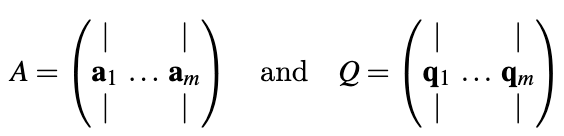

where A, Q are $nxm$ matrices. The output of the Gram-Schmidt algorithm can be written in a compact form, known as a QR decomposition,

$A=QR$

where column i of the matrix $mxm$ matrix R contains the coefficients of the linear conbination of $a_j's$ that produces $a_i$. Q is a $ℝ^{nxm}$ matrix with $Q^TQ = I_{mxm}$. It can be easier to verify $A=QR$ by

$A^T = R^TQ^T$

By the proof of Gram-Schmidt, $a_i ∈ span(q_1,...,q_i)$. So column i of R has only zeros below the diagonal. Hence R has a special structure: it is **upper triangular**.

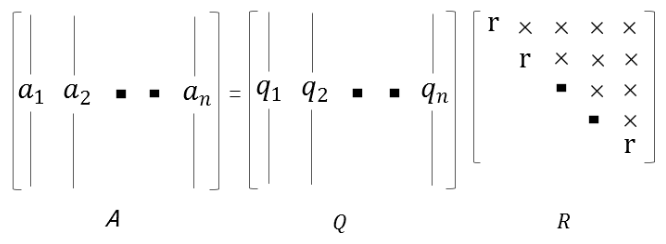

In [ ]:
### QR Decomposition Example ###

# Example matrix A
A = np.array([[1, 2, 8],
              [3, 11, 19],
              [5, 13, 6]])

print("Matrix A:\n", A)

# QR Decomposition using qr()
Q, R = qr(A)

print("Orthogonal Matrix Q:\n", Q)
## Notice R is upper triangular so there are 0s
## in the bottom left of the matrix under the diagonal
print("\nUpper Triangular Matrix R:\n", R)

# Prove that A = Q * R
print("Reconstructed A (Q @ R):\n")
print(Q @ R)

Matrix A:
 [[ 1  2  8]
 [ 3 11 19]
 [ 5 13  6]]
Orthogonal Matrix Q:
 [[-0.16903085  0.297775   -0.93955235]
 [-0.50709255 -0.84369583 -0.17616607]
 [-0.84515425  0.4466625   0.29361011]]

Upper Triangular Matrix R:
 [[ -5.91607978 -16.90308509 -16.05793084]
 [  0.          -2.87849167 -10.96804584]
 [  0.           0.          -9.1019134 ]]
Reconstructed A (Q @ R):

[[ 1.  2.  8.]
 [ 3. 11. 19.]
 [ 5. 13.  6.]]


## **1.3.2. Least-Squares Problems**

**Least-Squares Problems:** Let $A∈ℝ^{nxm}$ matrix and $b∈ℝ^n$ be a vector. We try to solve the system Ax=b, which is often inconsistent. We are looking to use the Ax to approximate b. It is reasonable to assume that matrix A has linearly independent columns. If n=m, that is, if A is a square matrix, we can use the matrix inverse to solve the system. But we are particularly interested in the over-determined case where n>m. We cannot use the matrix inverse then. One possibility to make sense of the problem in that case is to cast it as the least-squares problem.

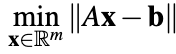

In order to use the orthogonal decomposition result, we write

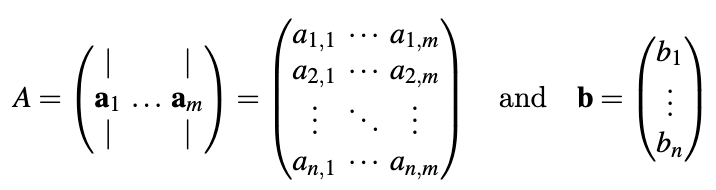

Now we seek a linear combination of the columns of A that minimizes the objective

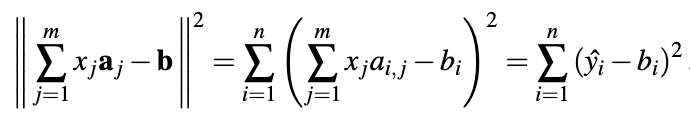

where

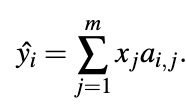


In [ ]:
### Least-Squares Example ###

# Matrix for the least-squares problem (A)
A = np.array([[2, 4, 19, 7],
              [3, 2, 9, 1],
              [4, 10, 11, 25]])

print("Matrix A:\n", A)

# Vector for the least-squares problem (b)
b = np.array([2, 3, 5])
print("\nVector b:\n", b)

# Solve the least-squares problem Ax = b
# Not using the rank or the singular values
leastSq, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

# Print the least squares solution and the residuals
print("Least-squares solution:\n", leastSq)
# the residuals represent the differences between the observed values (in your vector b)
# and the values predicted by your model in the direction of b
print("Residuals:\n", residuals)

Matrix A:
 [[ 2  4 19  7]
 [ 3  2  9  1]
 [ 4 10 11 25]]

Vector b:
 [2 3 5]
Least-squares solution:
 [ 0.90805746  0.34371018 -0.03841349 -0.06587133]
Residuals:
 []


## **1.3.3. Linear Regression**

**Linear Regression:** Linear regression is used frequently in practical applications because of its simplicity. The models depend linearly on their unknown parameters and therefore are easier to fit than models which are non-linearly related to their parameters. As a result, the statistical properties of the resulting estimators are easier to determine.

Given input data points ${(x_i,y_i)}^n_{i=1}$ with each $x_i = (x_{i1},...,x_{id})^T$, we seek an affline function to fit the data. The common approach involves finding coefficients $B_j$'s that minimize the criterion

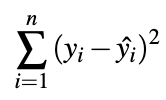

where

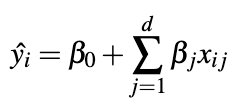

can be viewed as the predicted values of the linear model with coefficients $B_j$. The minimization problem can be formulated in matrix form. Let

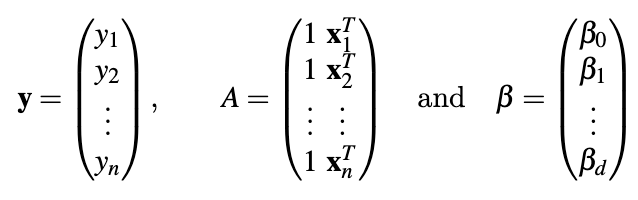

Then the problem is transformed to

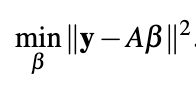

Intercept:  [4.22215108]
Slope:  [[2.96846751]]


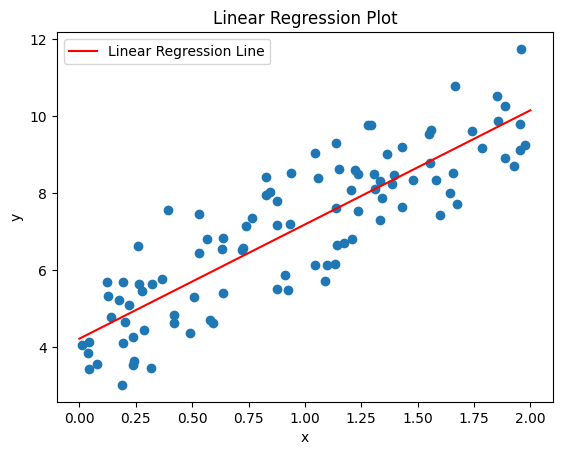

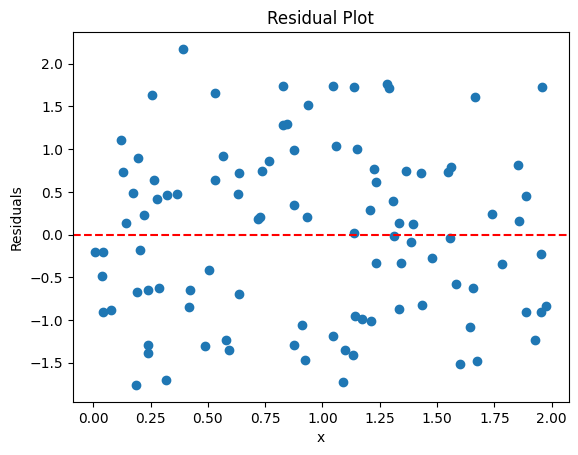

In [ ]:
### Linear Regression Example ###

# Generate some example data
np.random.seed(0)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

# Make a Linear Regression model and fit it to the random data
model = LinearRegression()
model.fit(x, y)

# Intercept and slope
intercept = model.intercept_
slope = model.coef_

print(f"Intercept: ", intercept)
print(f"Slope: ", slope)

# Predicting the x using the y
x_new = np.array([[0], [2]])
y_predict = model.predict(x_new)

# Plot the data and the regression line
# The line shows how well we predicted based on the data
# Using matplotlib
plt.scatter(x, y)
plt.plot(x_new, y_predict, "r-", label="Linear Regression Line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Plot")
plt.legend()
plt.show()

# Calculate the residuals
prediction = model.predict(x)
residuals = y - prediction

# Plot the residuals
# Random points show that the independent and dependent variables are linear
# This shows that the linear model is right for the data since there are no obvious patterns
plt.scatter(x, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("x")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()